1. Step 1: Load and Explore the Dataset
- Load the dataset into a DataFrame and examine the structure of the data.
2. Step 2: Plot the Distribution of Industry
Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.
3. Step 3: Identify High Compensation Outliers
Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).
4. Step 4: Detect Outliers in Compensation
Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.
5. Step 5: Remove Outliers and Create a New DataFrame
Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.
6. Step 6: Correlation Analysis
Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None


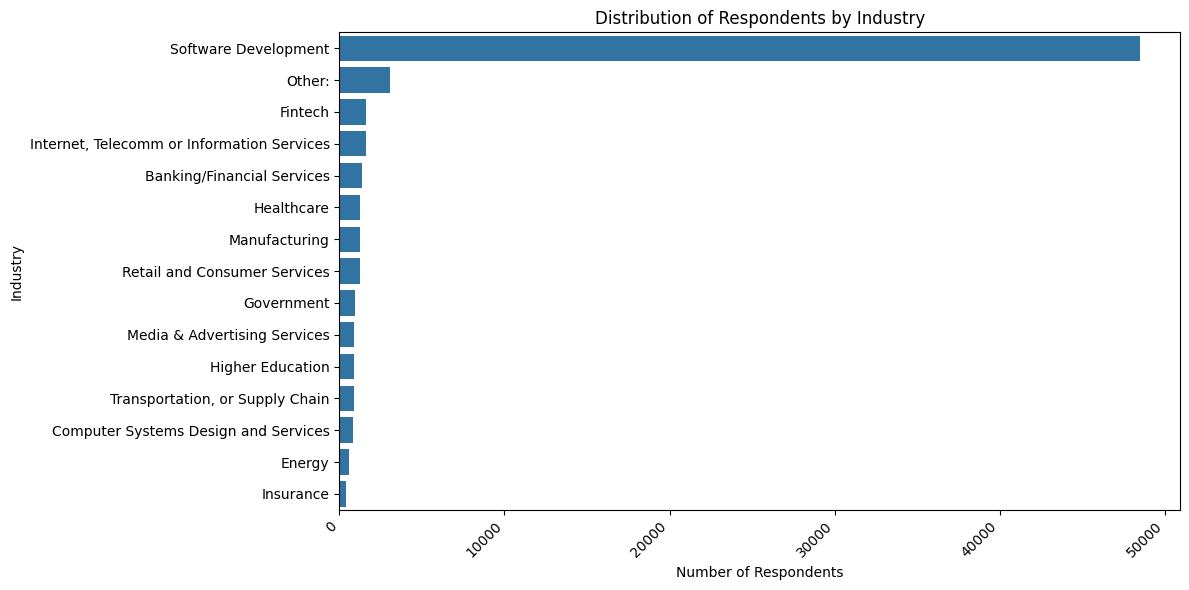

Notable Trends: (Describe any significant observations from the plot here)

Top 3 Industries:
Industry
Software Development    48497
Other:                   3077
Fintech                  1641
Name: count, dtype: int64

Compensation Statistics:
Mean: 72576.3582835399
Standard Deviation: 112220.68159721408
Threshold: 409238.4030751821

Number of Outliers (>3 std above mean): 194

IQR Outlier Detection:
IQR: 0.0
Lower Bound: 65000.0
Upper Bound: 65000.0
Number of Outliers: 23398


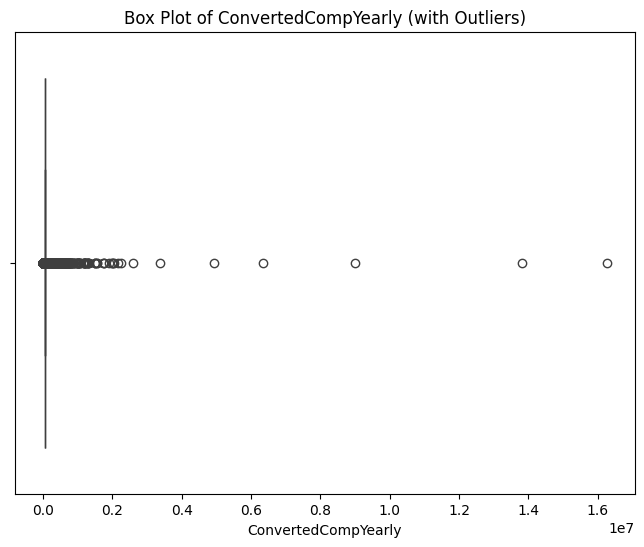

Original DataFrame size: 65437
New DataFrame size (without outliers): 42039


C:\Users\tdhoa\AppData\Local\Temp\ipykernel_13356\3441567436.py:104: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['AgeNumeric'] = df['Age'].map(age_mapping)
C:\Users\tdhoa\AppData\Local\Temp\ipykernel_13356\3441567436.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AgeNumeric'] = df['Age'].map(age_mapping)


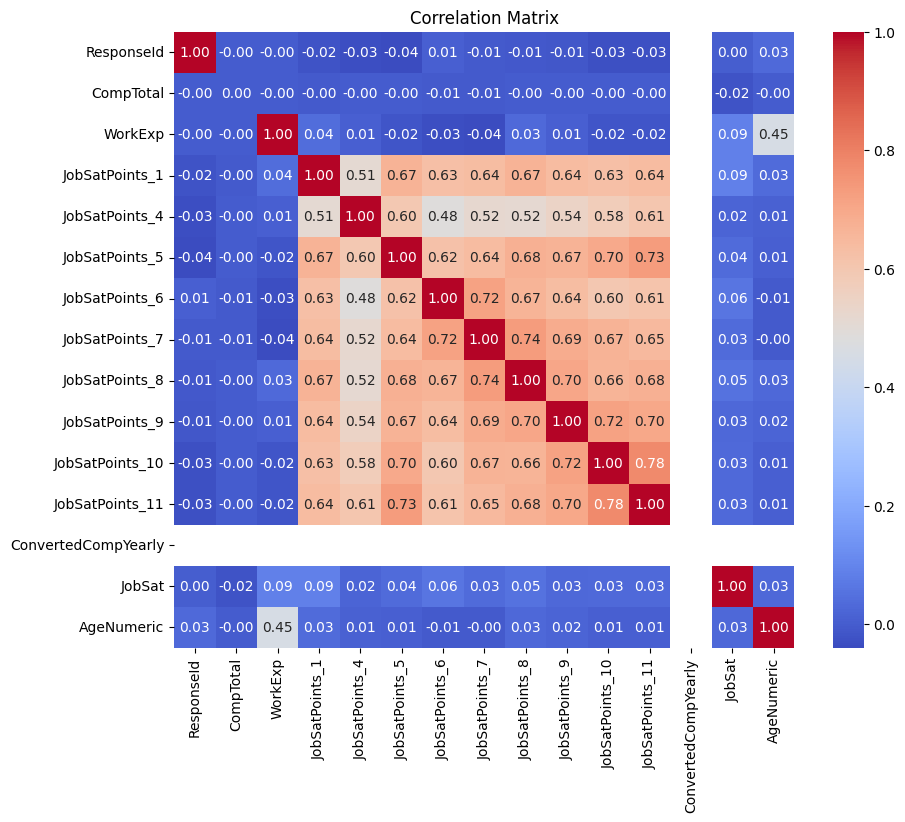


Correlation with AgeNumeric:
AgeNumeric             1.000000
WorkExp                0.455000
JobSatPoints_1         0.034107
ResponseId             0.033076
JobSat                 0.027952
JobSatPoints_8         0.027588
JobSatPoints_9         0.017537
JobSatPoints_4         0.012480
JobSatPoints_5         0.008175
JobSatPoints_11        0.007363
JobSatPoints_10        0.005942
CompTotal             -0.000955
JobSatPoints_7        -0.003461
JobSatPoints_6        -0.005770
ConvertedCompYearly         NaN
Name: AgeNumeric, dtype: float64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_explore_data(file_path):
    """Loads the dataset and displays basic information."""
    df = pd.read_csv(file_path)
    print("DataFrame Info:")
    print(df.info())
    return df

def handle_missing_data(df):
    """Handles missing data by imputation or removal."""
    for col in df.columns:
        if df[col].dtype == 'object':  # Impute categorical columns with mode
            df[col] = df[col].fillna(df[col].mode()[0])
        elif df[col].dtype == 'float64' or df[col].dtype == 'int64': # Impute numerical with median
            df[col] = df[col].fillna(df[col].median())

    return df

def plot_industry_distribution(df):
    """Plots the distribution of respondents across industries."""
    plt.figure(figsize=(12, 6))
    industry_counts = df['Industry'].value_counts()
    sns.countplot(y=df['Industry'], order=industry_counts.index)
    plt.title('Distribution of Respondents by Industry')
    plt.xlabel('Number of Respondents')
    plt.ylabel('Industry')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()
    print("Notable Trends: (Describe any significant observations from the plot here)")
    # Example:  Print the top 3 industries
    print("\nTop 3 Industries:")
    print(industry_counts.head(3))



def identify_high_compensation_outliers(df, threshold_std=3):
    """Identifies high compensation outliers based on standard deviations."""
    comp_mean = df['ConvertedCompYearly'].mean()
    comp_std = df['ConvertedCompYearly'].std()
    threshold = comp_mean + threshold_std * comp_std
    outliers = df[df['ConvertedCompYearly'] > threshold]
    print("\nCompensation Statistics:")
    print(f"Mean: {comp_mean}")
    print(f"Standard Deviation: {comp_std}")
    print(f"Threshold: {threshold}")
    print(f"\nNumber of Outliers (>{threshold_std} std above mean): {len(outliers)}")
    return outliers


def detect_compensation_outliers_iqr(df):
    """Detects compensation outliers using the IQR method."""
    Q1 = df['ConvertedCompYearly'].quantile(0.25)
    Q3 = df['ConvertedCompYearly'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
    print("\nIQR Outlier Detection:")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {len(outliers)}")

    # Visualize outliers using a box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['ConvertedCompYearly'])
    plt.title('Box Plot of ConvertedCompYearly (with Outliers)')
    plt.xlabel('ConvertedCompYearly')
    plt.show()

    return outliers


def remove_outliers_create_new_df(df, outliers):
    """Removes outliers and creates a new DataFrame."""

    df_no_outliers = df[~df.index.isin(outliers.index)] #.copy() if you need a separate copy

    print(f"Original DataFrame size: {len(df)}")
    print(f"New DataFrame size (without outliers): {len(df_no_outliers )}")
    return df_no_outliers



def correlation_analysis(df):
    """Performs correlation analysis between age and other numeric columns."""

    age_mapping = {
        'Under 18 years old': 17,
        '18-24 years old': 21,  # Midpoint of the range
        '25-34 years old': 30,
        '35-44 years old': 40,
        '45-54 years old': 50,
        '55-64 years old': 60,
        '65-74 years old': 70,
        '75 years or older': 76   # Use a value slightly higher than 75
    }

    df['AgeNumeric'] = df['Age'].map(age_mapping)

    numeric_cols = df.select_dtypes(include=np.number).columns
    correlation_matrix = df[numeric_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    print("\nCorrelation with AgeNumeric:")
    print(correlation_matrix['AgeNumeric'].sort_values(ascending=False))


# Example usage (replace 'survey_results_public.csv' with your file path)
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = load_and_explore_data(file_path)
df = handle_missing_data(df) #handle missing values from the previous answer's code

plot_industry_distribution(df)
high_comp_outliers = identify_high_compensation_outliers(df)
iqr_outliers = detect_compensation_outliers_iqr(df)  # You can choose which outlier method to use
df_no_outliers = remove_outliers_create_new_df(df, iqr_outliers)  # Using IQR outliers for this example
correlation_analysis(df_no_outliers)